In [1]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,108.839996,109.639999,108.360001,109.379997,103.630051,20727900
1,2018-09-11,108.900002,111.589996,108.889999,111.239998,105.392265,24301800
2,2018-09-12,111.430000,111.849998,110.510002,111.709999,105.837578,18891100
3,2018-09-13,112.120003,113.730003,112.120003,112.910004,106.974503,26055600
4,2018-09-14,113.360001,113.730003,112.440002,113.370003,107.410324,19122300
...,...,...,...,...,...,...,...
1253,2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
1254,2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
1255,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
1256,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2018-09-10,109.379997
1,2018-09-11,111.239998
2,2018-09-12,111.709999
3,2018-09-13,112.910004
4,2018-09-14,113.370003
...,...,...
1253,2023-09-01,328.660004
1254,2023-09-05,333.549988
1255,2023-09-06,332.880005
1256,2023-09-07,329.910004


In [3]:
df['Date']

0       2018-09-10
1       2018-09-11
2       2018-09-12
3       2018-09-13
4       2018-09-14
           ...    
1253    2023-09-01
1254    2023-09-05
1255    2023-09-06
1256    2023-09-07
1257    2023-09-08
Name: Date, Length: 1258, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2018-09-10,109.379997
1,2018-09-11,111.239998
2,2018-09-12,111.709999
3,2018-09-13,112.910004
4,2018-09-14,113.370003
...,...,...
1253,2023-09-01,328.660004
1254,2023-09-05,333.549988
1255,2023-09-06,332.880005
1256,2023-09-07,329.910004


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-09-10
1      2018-09-11
2      2018-09-12
3      2018-09-13
4      2018-09-14
          ...    
1253   2023-09-01
1254   2023-09-05
1255   2023-09-06
1256   2023-09-07
1257   2023-09-08
Name: Date, Length: 1258, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2018-09-10,109.379997
2018-09-11,111.239998
2018-09-12,111.709999
2018-09-13,112.910004
2018-09-14,113.370003
...,...
2023-09-01,328.660004
2023-09-05,333.549988
2023-09-06,332.880005


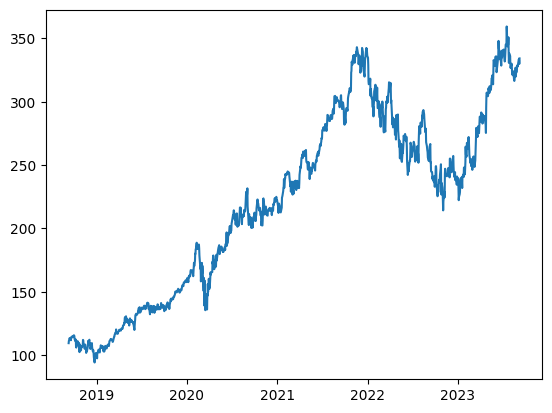

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

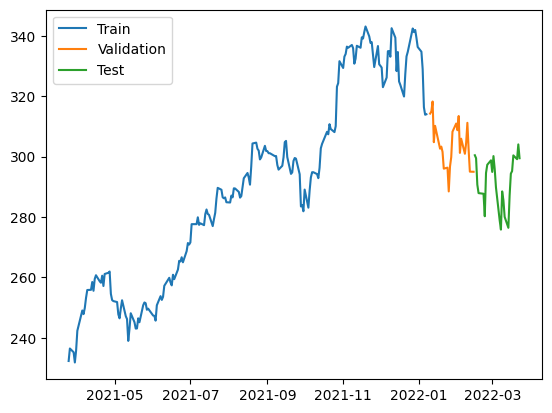

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 116ms/step - loss: 84417.5859 - mean_absolute_error: 288.8044 - val_loss: 92066.9609 - val_mean_absolute_error: 303.3381
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 84114.1875 - mean_absolute_error: 288.2778 - val_loss: 91696.4062 - val_mean_absolute_error: 302.7267
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 83709.2344 - mean_absolute_error: 287.5735 - val_loss: 91164.5312 - val_mean_absolute_error: 301.8469
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 83136.4453 - mean_absolute_error: 286.5799 - val_loss: 90482.0234 - val_mean_absolute_error: 300.7142
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 82463.4766 - mean_absolute_error: 285.4010 - val_loss: 89709.4219 - val_mean_absolute_error: 299.4268
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 81637.0781 - mean_absolute_error: 283.9444 - val_loss: 88

7/7 [==============================] - 1s 3ms/step


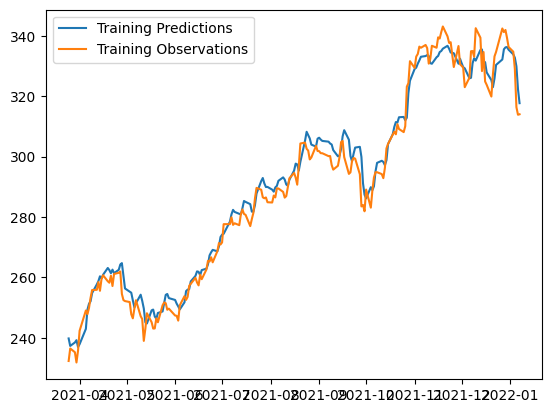

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 34ms/step


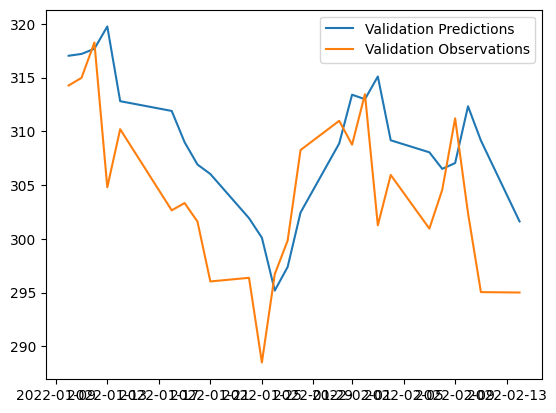

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


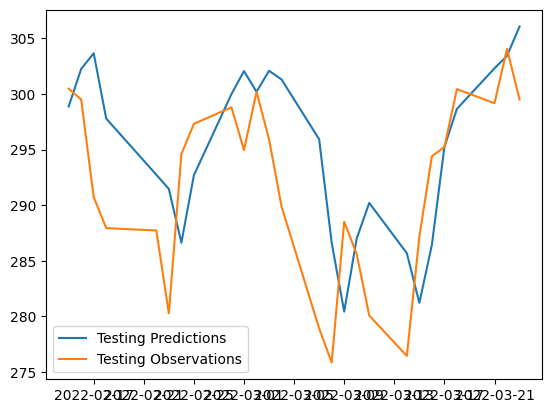

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

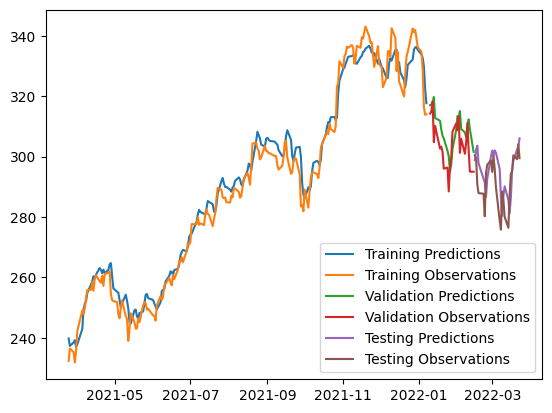

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


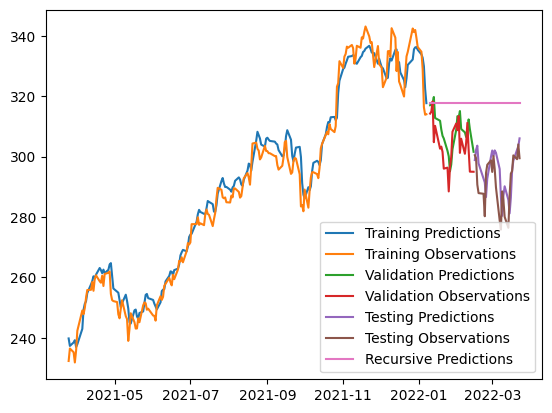

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])